## Problem statement

To build a machine learning model using Logistic Regression and predict whether a person is diabetic or not

## Dataset Information

### Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


This dataset consists of nine columns
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Agenda

1. Importing Libraries and dataset
2. Basic data exploration
3. Scaling of x_data Feature's
4. Train-Test Split
5. Logistic Regression using sklearn

## Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
#df = pd.read_csv("diabetes_data.csv")
#df.head()

In [2]:
df = pd.read_csv('Diabetes.csv') # loading the data set and reading
df.head() # showing top 5 details in data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore the data

In [5]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
## Lets check the statistical summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


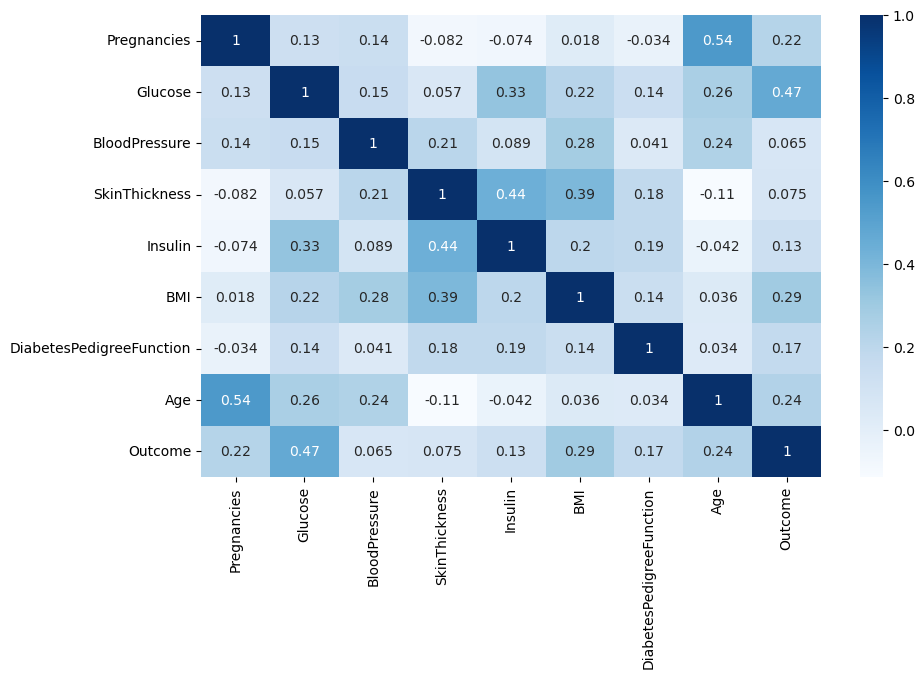

In [7]:
## lets visualize the correlation using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

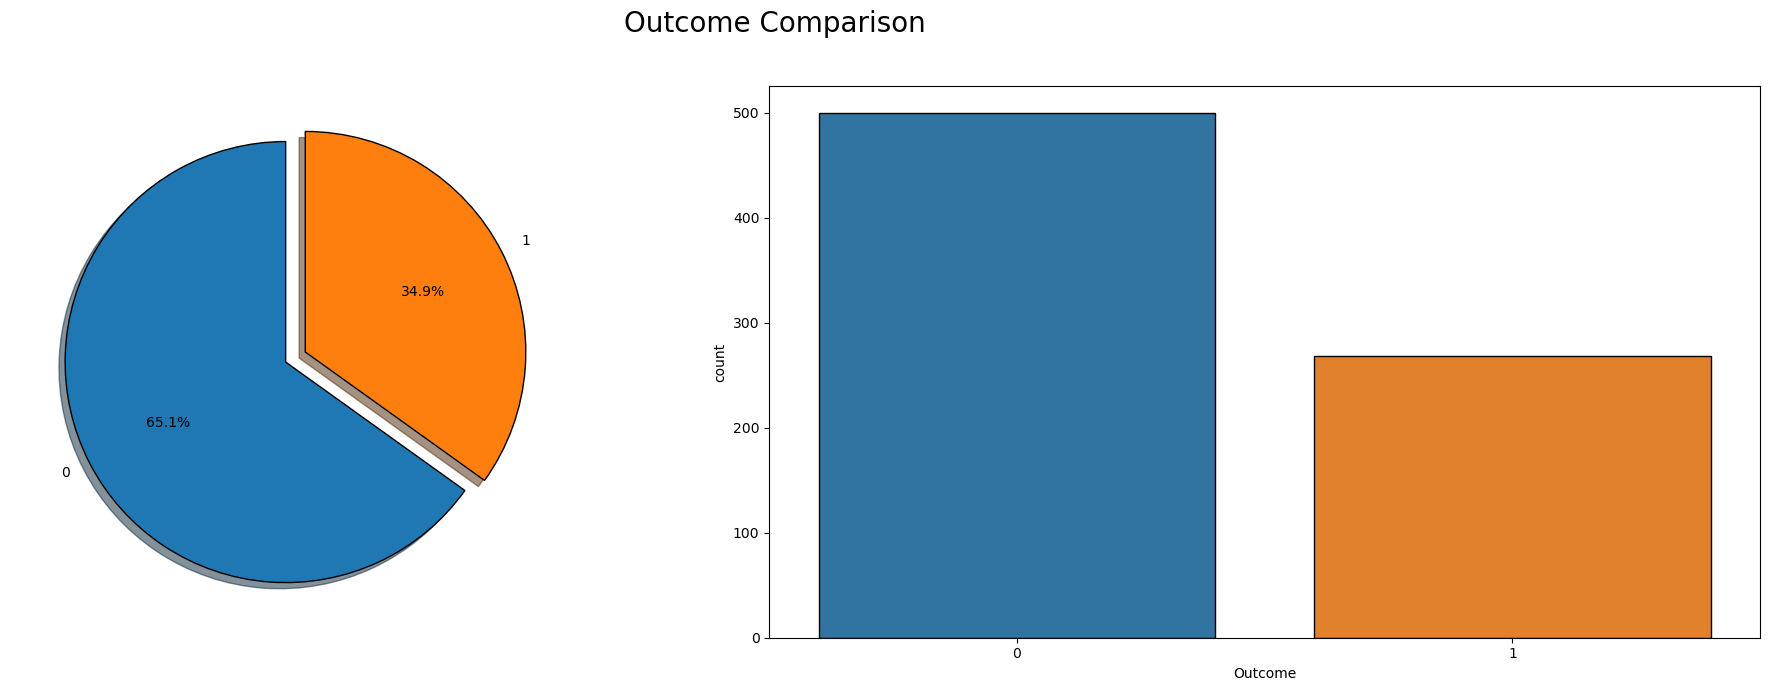

In [8]:
# Let's check whether the outcome is balanced or not
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
fig.suptitle('Outcome Comparison\n', fontsize=20)

ax1.pie(df.Outcome.value_counts().values, labels=df.Outcome.value_counts().index, startangle=90, explode=(0.0, 0.1), shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
sns.countplot(ax=ax2, data=df, x='Outcome', edgecolor='black')

plt.tight_layout()

### Split and Scale the data

In [6]:
## separate independent and target variable
X = df_3.drop('Outcome',axis=1)
Y = df_3['Outcome']

## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=22, stratify = Y)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])   # learned transformation - transformation learned on training data
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:]) # apply the learned transfomration on test data
# only fit vs fit_transform vs only transform

(725, 8) (311, 8)
(725,) (311,)


# Logistic regression Using Sklearn library

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [9]:
y_pred_train = log_reg.predict(X_train)

In [17]:
y_pred_train

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [10]:
accuracy_score(Y_train,y_pred_train)

0.7503448275862069

In [19]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       350
           1       0.76      0.76      0.76       375

    accuracy                           0.75       725
   macro avg       0.75      0.75      0.75       725
weighted avg       0.75      0.75      0.75       725



In [20]:
y_pred = log_reg.predict(X_test)

In [21]:
accuracy_score(Y_test,y_pred)

0.7620578778135049

In [22]:
## Compute precision, recall and F1-score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       150
           1       0.80      0.72      0.76       161

    accuracy                           0.76       311
   macro avg       0.76      0.76      0.76       311
weighted avg       0.77      0.76      0.76       311



In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(Y_test, y_pred)

array([[121,  29],
       [ 45, 116]], dtype=int64)

In [ ]:
# Below method is Oversampling the data for best accuracy score

In [11]:
df.shape

(768, 9)

In [12]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [13]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]

In [5]:
df_2 = df_0.append(df_1)
df_3 = df_2.append(df_1) # appending the values of 'Yes' into the data oversampling

----
## Happy Learning:)
----